In [ ]:
!pip install pandas

In [3]:
import csv
import networkx as nx 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
G=nx.Graph()


In [5]:
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_node(4)

In [6]:
G.nodes

NodeView((1, 2, 3, 4))

In [7]:
G.add_edge(1,2)

In [8]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 1
Average degree:   0.5000


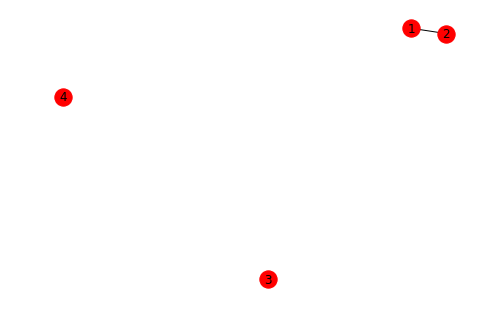

In [9]:
nx.draw(G,with_labels=True)

In [10]:
!head ../connected-nx-tutorial/data/ga_edgelist.csv

"from","to"
"lexi","sloan"
"lexi","karev"
"owen","yang"
"owen","altman"
"sloan","torres"
"sloan","altman"
"torres","arizona"
"torres","karev"
"derek","grey"


In [12]:
edges = []
with open('../connected-nx-tutorial/data/ga_edgelist.csv', 'r') as f:
    filereader = csv.reader(f, delimiter=",", quotechar='"')
    next(filereader) # skips header row
    for row in filereader:
            edges.append(row)

In [13]:
pd.DataFrame(edges)

,0,1
0,lexi,sloan
1,lexi,karev
2,owen,yang
3,owen,altman
4,sloan,torres
5,sloan,altman
6,torres,arizona
7,torres,karev
8,derek,grey
9,karev,izzie


In [14]:
GA = nx.from_edgelist(edges)

In [15]:
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


In [16]:
file="../connected-nx-tutorial/data/ga_edgelist.csv"
ga_edges = pd.read_csv(file)

ga_edges.head()

,from,to
0,lexi,sloan
1,lexi,karev
2,owen,yang
3,owen,altman
4,sloan,torres


In [17]:
GA = nx.from_pandas_edgelist(ga_edges, source="from", target="to")

In [18]:
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


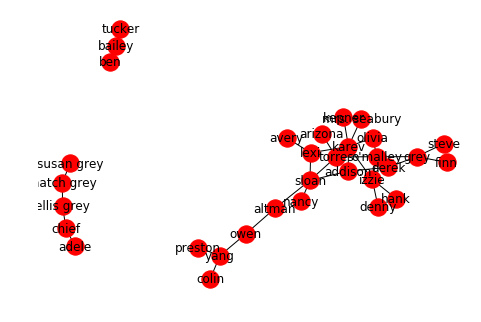

In [20]:
nx.draw(GA, with_labels=True)

In [21]:
ga_adj = pd.read_csv('../connected-nx-tutorial/data/ga_adj.csv', index_col=0)

ga_adj.ix[0:5, 0:5]

/home/ali/PycharmProjects/tensor/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,denny,kepner,grey,colin,finn
denny,0.0,0.0,0.0,0.0,0.0
kepner,0.0,0.0,0.0,0.0,0.0
grey,0.0,0.0,0.0,0.0,1.0
colin,0.0,0.0,0.0,0.0,0.0
finn,0.0,0.0,1.0,0.0,0.0


In [22]:
GAAdj = nx.from_numpy_matrix(ga_adj.values)

In [23]:
label_mapping = dict(zip(GAAdj.nodes(), ga_adj.columns))

GAAdj = nx.relabel_nodes(GAAdj, label_mapping)

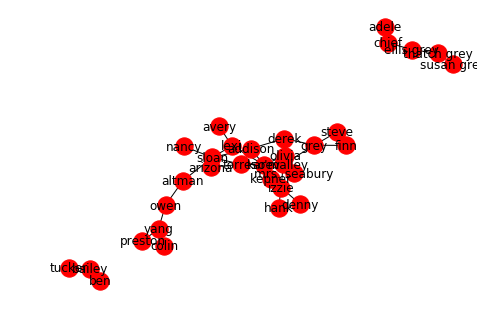

In [24]:
nx.draw_spring(GAAdj, with_labels=True)

In [25]:
print("Edge List Graph\n", nx.info(GA))
print("\nAdj. Matrix Graph\n", nx.info(GAAdj))

Edge List Graph
 Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250

Adj. Matrix Graph
 Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


In [26]:
print("Isomorphic?", nx.is_isomorphic(GA, GAAdj))

Isomorphic? True


In [ ]:
print("'denny' From Edge List Graph:", GA['denny'])
print("'denny' From Adjacency Matrix Graph:", GAAdj['denny'])

In [27]:
nx.write_gexf(GA, 'ga_graph.gexf')

In [28]:
!ls

123.zip		    community.ipynb	  helpers.py	  web-Stanforddi.txt
1.intro.ipynb	    degree_histogram.png  __pycache__	  web-Stanford.txt
2.centrality.ipynb  ga_graph.gexf	  Untitled.ipynb  web-Stanford.txt.gz


In [ ]:
nx.read_gexf()

In [29]:
GA = nx.read_gexf('ga_graph.gexf')
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


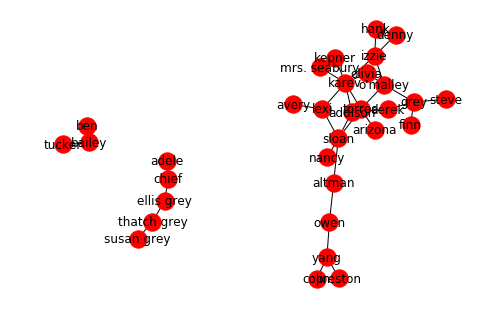

In [30]:
nx.draw(GA, with_labels=True)

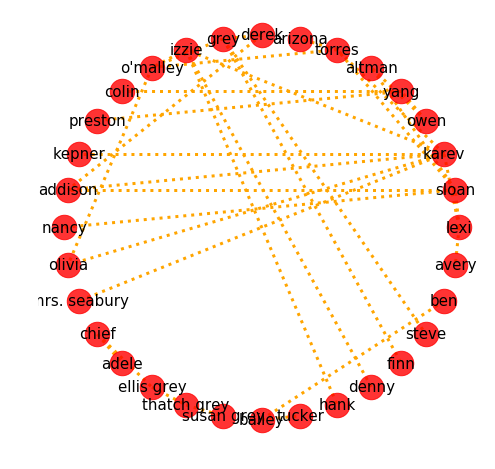

In [31]:
plt.figure(figsize=(8,8))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.circular_layout(GA)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(GA, pos=layout, node_size=600, alpha=0.8)
nx.draw_networkx_edges(GA, pos=layout, width=3, style='dotted',
                       edge_color='orange')
nx.draw_networkx_labels(GA, pos=layout, font_size=15)

plt.show()